# Credit Card Fraud Detection

> Source: Credit Fraud || Dealing with Imbalanced Datasets ([link](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets))

## Definiciones importantes

### Tranformación PCA
**Introducción**:

La transformación PCA, o análisis de componentes principales (ACP), es una técnica fundamental en el análisis de datos que permite **reducir la dimensionalidad de un dataset y obtener información valiosa**.

**Beneficios**:

- **Simplifica el análisis**: Al reducir la cantidad de variables, se facilita la comprensión de las relaciones entre ellas y la identificación de patrones en los datos.
- **Elimina la redundancia**: Elimina la correlación entre las variables, lo que permite enfocarse en la información más relevante.
- **Mejora la precisión de los modelos**: Al seleccionar las variables más importantes, se pueden crear modelos de aprendizaje automático más precisos.

**Funcionamiento**:

1) **Calcular la varianza de cada variable**: Se determina la importancia de cada variable en la descripción del dataset.
2) **Encontrar los componentes principales**: Se identifican las direcciones de mayor varianza en el dataset, las cuales definen los nuevos ejes.
3) **Transformar los datos**: Se proyectan los datos originales sobre los nuevos ejes, obteniendo las nuevas variables (componentes principales).

**Interpretación**:

- Cada componente principal representa una combinación lineal de las variables originales.
- El primer componente principal explica la mayor parte de la varianza en el dataset.
- Los componentes principales sucesivos explican cada vez menos varianza.

**Aplicaciones**:

- **Análisis de imágenes**: Reducción de la dimensionalidad de imágenes para facilitar su reconocimiento.
- **Análisis de datos financieros**: Identificación de patrones en el comportamiento del mercado.
- **Análisis de datos de clientes**: Segmentación de clientes en grupos con características similares.
- **Bioinformática**: Análisis de datos genómicos y proteómicos.

**Limitaciones**:

- No funciona bien con datos no lineales.
- Es sensible a la escala de las variables.
- Puede ser difícil de interpretar los componentes principales.


-----------------------------------------------------------------

### Escalar las columnas en un DataFrame

**¿Qué es?**

Escalar las columnas en un DataFrame consiste en transformar los valores de cada columna individualmente para que tengan una escala similar. Esto puede ser útil por varios motivos:

1. **Mejora la comparabilidad** <br>Si las columnas tienen diferentes unidades o rangos de valores, compararlas directamente puede ser engañoso. Escalarlas permite compararlas de forma más justa.



2. **Normaliza los datos**<br>Escalar los datos puede ayudar a que se ajusten a una distribución normal, lo que puede ser necesario para algunos algoritmos de aprendizaje automático.



3. **Aumenta la precisión de los modelos**<br>En algunos casos, escalar las columnas puede mejorar la precisión de los modelos de aprendizaje automático.



**¿Cómo se hace?**

Existen diferentes métodos para escalar las columnas de un DataFrame. Algunos de los más comunes son:

- **Estandarización**: Resta la media y divide por la desviación estándar de cada columna.
- **Normalización**: Transforma los valores de cada columna a un rango entre 0 y 1.
- **Escalado máximo-mínimo**: Transforma los valores de cada columna al rango mínimo y máximo especificados.


---------------------
--------------------

## Gather Sense of Data

### Summary

- The transaction amount is relatively **small**. The mean of all the amounts made is approximately USD 88.
- There ara no **Null** values, so we don´t have to work on ways to replace values.
- Most of the transactions were **Non-Fraud** (99.83%) of the time, while **Fraud** transactions occurs (0,17%) of the time in the dataframe.

### Feature Technicalities

- **Scaling**: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

## Imported libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
path = "C:\\Users\\daniel.martinezcarre\\Desktop\\datasets\\creadit_card_dataset\\creditcard.csv"
df_card = pd.read_csv(path)
df_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Analyzing dataset

### How many Null Values ?

In [4]:
df_card.isnull().sum().max()

0

### Columns

In [5]:
df_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Fraud percentage
- **1** -> Fraud
- **0** -> No Fraud

In [6]:
print('No Frauds', round(df_card['Class'].value_counts()[0]/len(df_card) * 100, 2),'% of the dataset')
print('Frauds', round(df_card['Class'].value_counts()[1]/len(df_card) * 100, 2),'% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


The original dataset is so imbalanced, most of the transactions are non-fraud.

(0.0, 172792.0)

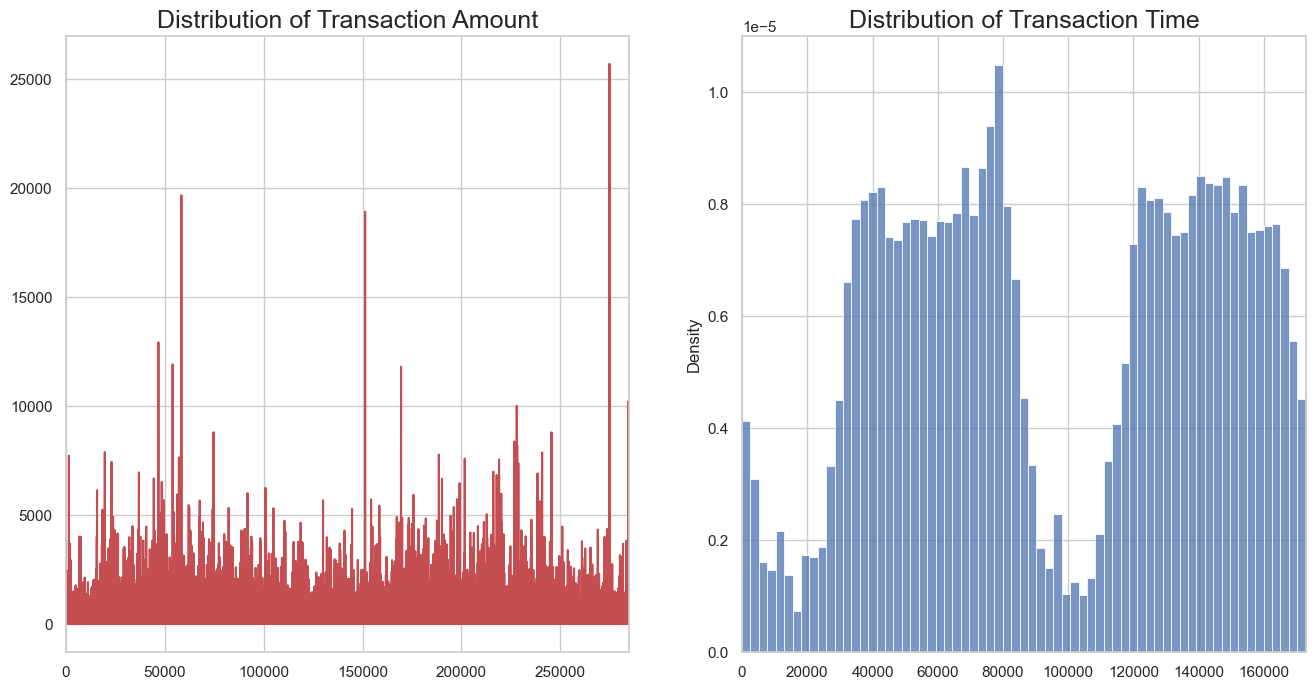

In [7]:
sns.set_theme(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

amount_val = df_card['Amount'].values
time_val = df_card['Time'].values

sns.lineplot(x=range(len(amount_val)), y=amount_val, ax=ax1, color='r')
ax1.set_title('Distribution of Transaction Amount', fontsize=18)
ax1.set_xlim(0, len(amount_val))

sns.histplot(time_val, ax=ax2, color='b', stat="density")
ax2.set_title('Distribution of Transaction Time', fontsize=18)
ax2.set_xlim(min(time_val), max(time_val))


### Scaling and Distributing
In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

In [8]:
df_card.value_counts("Class")[1]

492

There are 492 cases of fraud in the dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe 

- **StandardScaler**: Escala los datos usando la media y desviación estándar.
- **RobustScaler**: Escala los datos usando mediana y rango intercuartilar (IQR), siendo menos sensible a valores atípicos (outliers).

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler es menos susceptible outliers. (No le afecta tanto)

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_card['scaled_amount'] = rob_scaler.fit_transform(df_card['Amount'].values.reshape(-1,1))
df_card['scaled_time'] = rob_scaler.fit_transform(df_card['Time'].values.reshape(-1,1))

"""El reshape es para transformar el array a una matriz con una columna para que sea compatible
con fit_transform"""

'El reshape es para transformar el array a una matriz con una columna para que sea compatible\ncon fit_transform'

In [10]:
df_card.drop(['Time','Amount'], axis=1, inplace=True)

Changing the position of columns 'scaled_amount' and 'scaled_time'

In [12]:
scaled_amount = df_card['scaled_amount']
scaled_time = df_card['scaled_time']

df_card.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df_card.insert(0, 'scaled_amount', scaled_amount)
df_card.insert(1, 'scaled_time', scaled_time)

df_card.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the Data (Original DataFrame)